In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (7, 4.5)
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

In [4]:
from sklearn.ensemble import RandomForestRegressor
#use regressor for numerical values

# use RF on every var as y, sum up importance across rows
# column is the Y value used

data = pd.read_csv("OutliersRemoved2.csv")
data = data.drop(data.columns[[0,1,2,3,4,5,6]],axis = 1)

# imputation by subbing with mean on copy of data
data = data.dropna(thresh = 5000, axis = 'columns')
data = data.dropna(how = 'any', thresh = 40)

data1 = data.fillna(data.mean())

# shuffle 
data1 = shuffle(data1, random_state = 0)


In [11]:
def importance_charter(y_vals):
    rf2 = RandomForestRegressor(n_estimators=500)
    reg_imp = pd.DataFrame(data =0,index = data1.columns,columns = data1.columns)
    
    for y in list(y_vals):
        Y3 = data1[y]
        X3 = data1.drop(y, axis =1)
        X3_train, X3_test, Y3_train, Y3_test = train_test_split(X3, Y3, test_size=0.15, random_state = 0)    
        rf2.fit(X3_train, Y3_train)
        run = rf2.feature_importances_ 

        d = dict(zip(X3.columns,run))
        for x in X3.columns:
            reg_imp.loc[x,y] = d[x]

    reg_imp_sum = pd.DataFrame(data = reg_imp.sum(axis=1),index = data1.columns,columns = ["Importance"])

    # drop 0 values for classificatoin and regression
    reg_imp_sum = reg_imp_sum.iloc[3:]

    # top 10 regressors
    regressors = reg_imp_sum.sort_values( [ 'Importance' ] , ascending = True )
    regressors[:10].plot( kind = 'barh' )
    print("This is the sum importance chart for regressing the other numerical features")

This is the sum importance chart for regressing the other numerical features


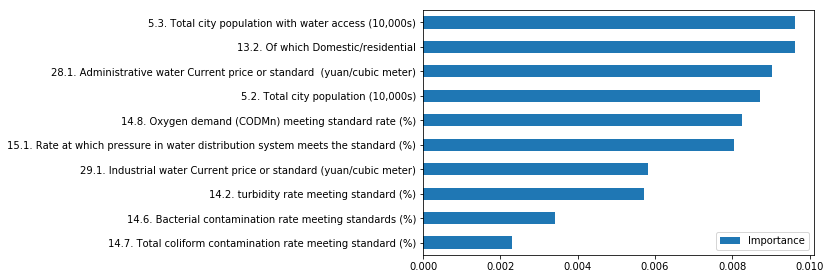

In [14]:
leakage_rate = ["9. Loss and leakage volume (10,000 cubic metres)",
                "10. Loss and leakage rate (%)"]
importance_charter(leakage_rate)

This is the sum importance chart for regressing the other numerical features


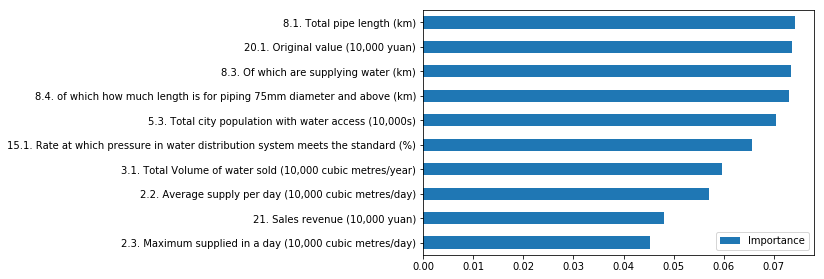

In [20]:
water_quality = ["14.1. Overall rate of water that meets standard (%)",
                 "14.2. turbidity rate meeting standard (%)",
                "14.6. Bacterial contamination rate meeting standards (%)",
                 "14.7. Total coliform contamination rate meeting standard (%)",
                 "14.8. Oxygen demand (CODMn) meeting standard rate (%)",
                 "15.1. Rate at which pressure in water distribution system meets the standard (%)"]
importance_charter(water_quality)

This is the sum importance chart for regressing the other numerical features


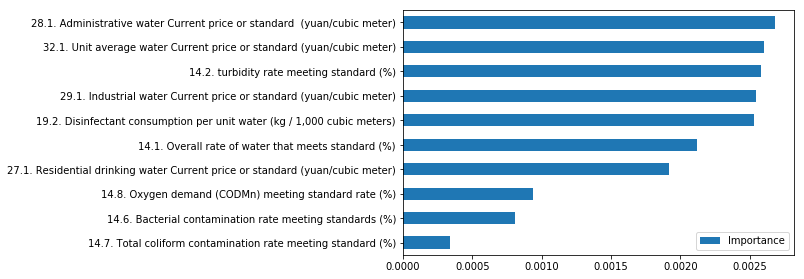

In [13]:
population = ["5.2. Total city population (10,000s)",
              "5.3. Total city population with water access (10,000s)"]
importance_charter(population)

This is the sum importance chart for regressing the other numerical features


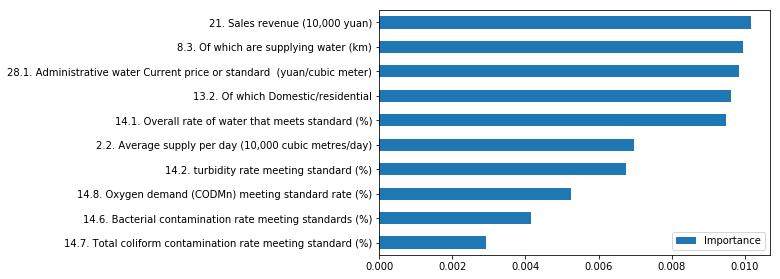

In [12]:
water_use = ["6.1. Average water use for all purposes (L/person*day)",
             "6.2. Average water use for residential/household/living purposes (L/person*day)"]
importance_charter(water_use)

This is the sum importance chart for regressing the other numerical features


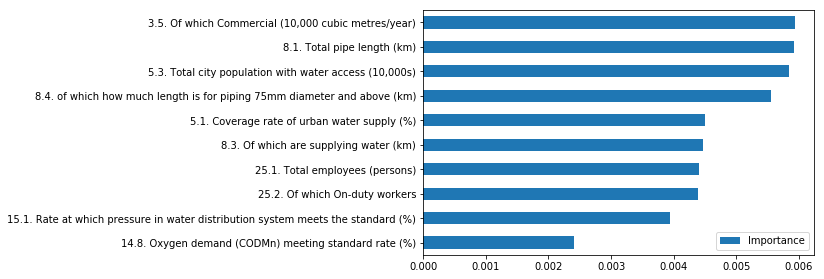

In [19]:
disinfectant_consumption = ["19.1. Total disinfectant consumption (kg)",
"19.2. Disinfectant consumption per unit water (kg / 1,000 cubic meters)"]
importance_charter(disinfectant_consumption)